In [14]:
import cv2 as cv
import numpy as np
import os
import glob
import functions as fn

In [10]:
def camera_params(chessboard, path, typeim):
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    objpoints = []
    imgpoints = [] 
    objp = np.zeros((1, chessboard[0] * chessboard[1], 3), np.float32)
    objp[0,:,:2] = np.mgrid[0:chessboard[0], 0:chessboard[1]].T.reshape(-1, 2)
    prev_img_shape = None
    images = glob.glob(path+'/*.'+typeim)
    for fname in images:
        img = cv.imread(fname)
        if img.shape[0] > img.shape[1]:
            img = cv.rotate(img,cv.ROTATE_90_COUNTERCLOCKWISE)
        gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

        ret, corners = cv.findChessboardCorners(gray, chessboard, cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)
    
        if ret == True:
            objpoints.append(objp)
            corners2 = cv.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        
            imgpoints.append(corners2)
            
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    h,  w = gray.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
    return [mtx, dist, newcameramtx, roi]

In [11]:
chessboard = (6, 9)
path = "../Mindvision"
typeim = "BMP"
params = fn.camera_params(chessboard, path, typeim)

In [12]:
def undistort_image(im, cam_params):
    mtx, dist, newcameramtx, roi = cam_params
    x, y, w, h = roi
    return cv.undistort(im, mtx, dist, None, newcameramtx)[y:y+h, x:x+w]

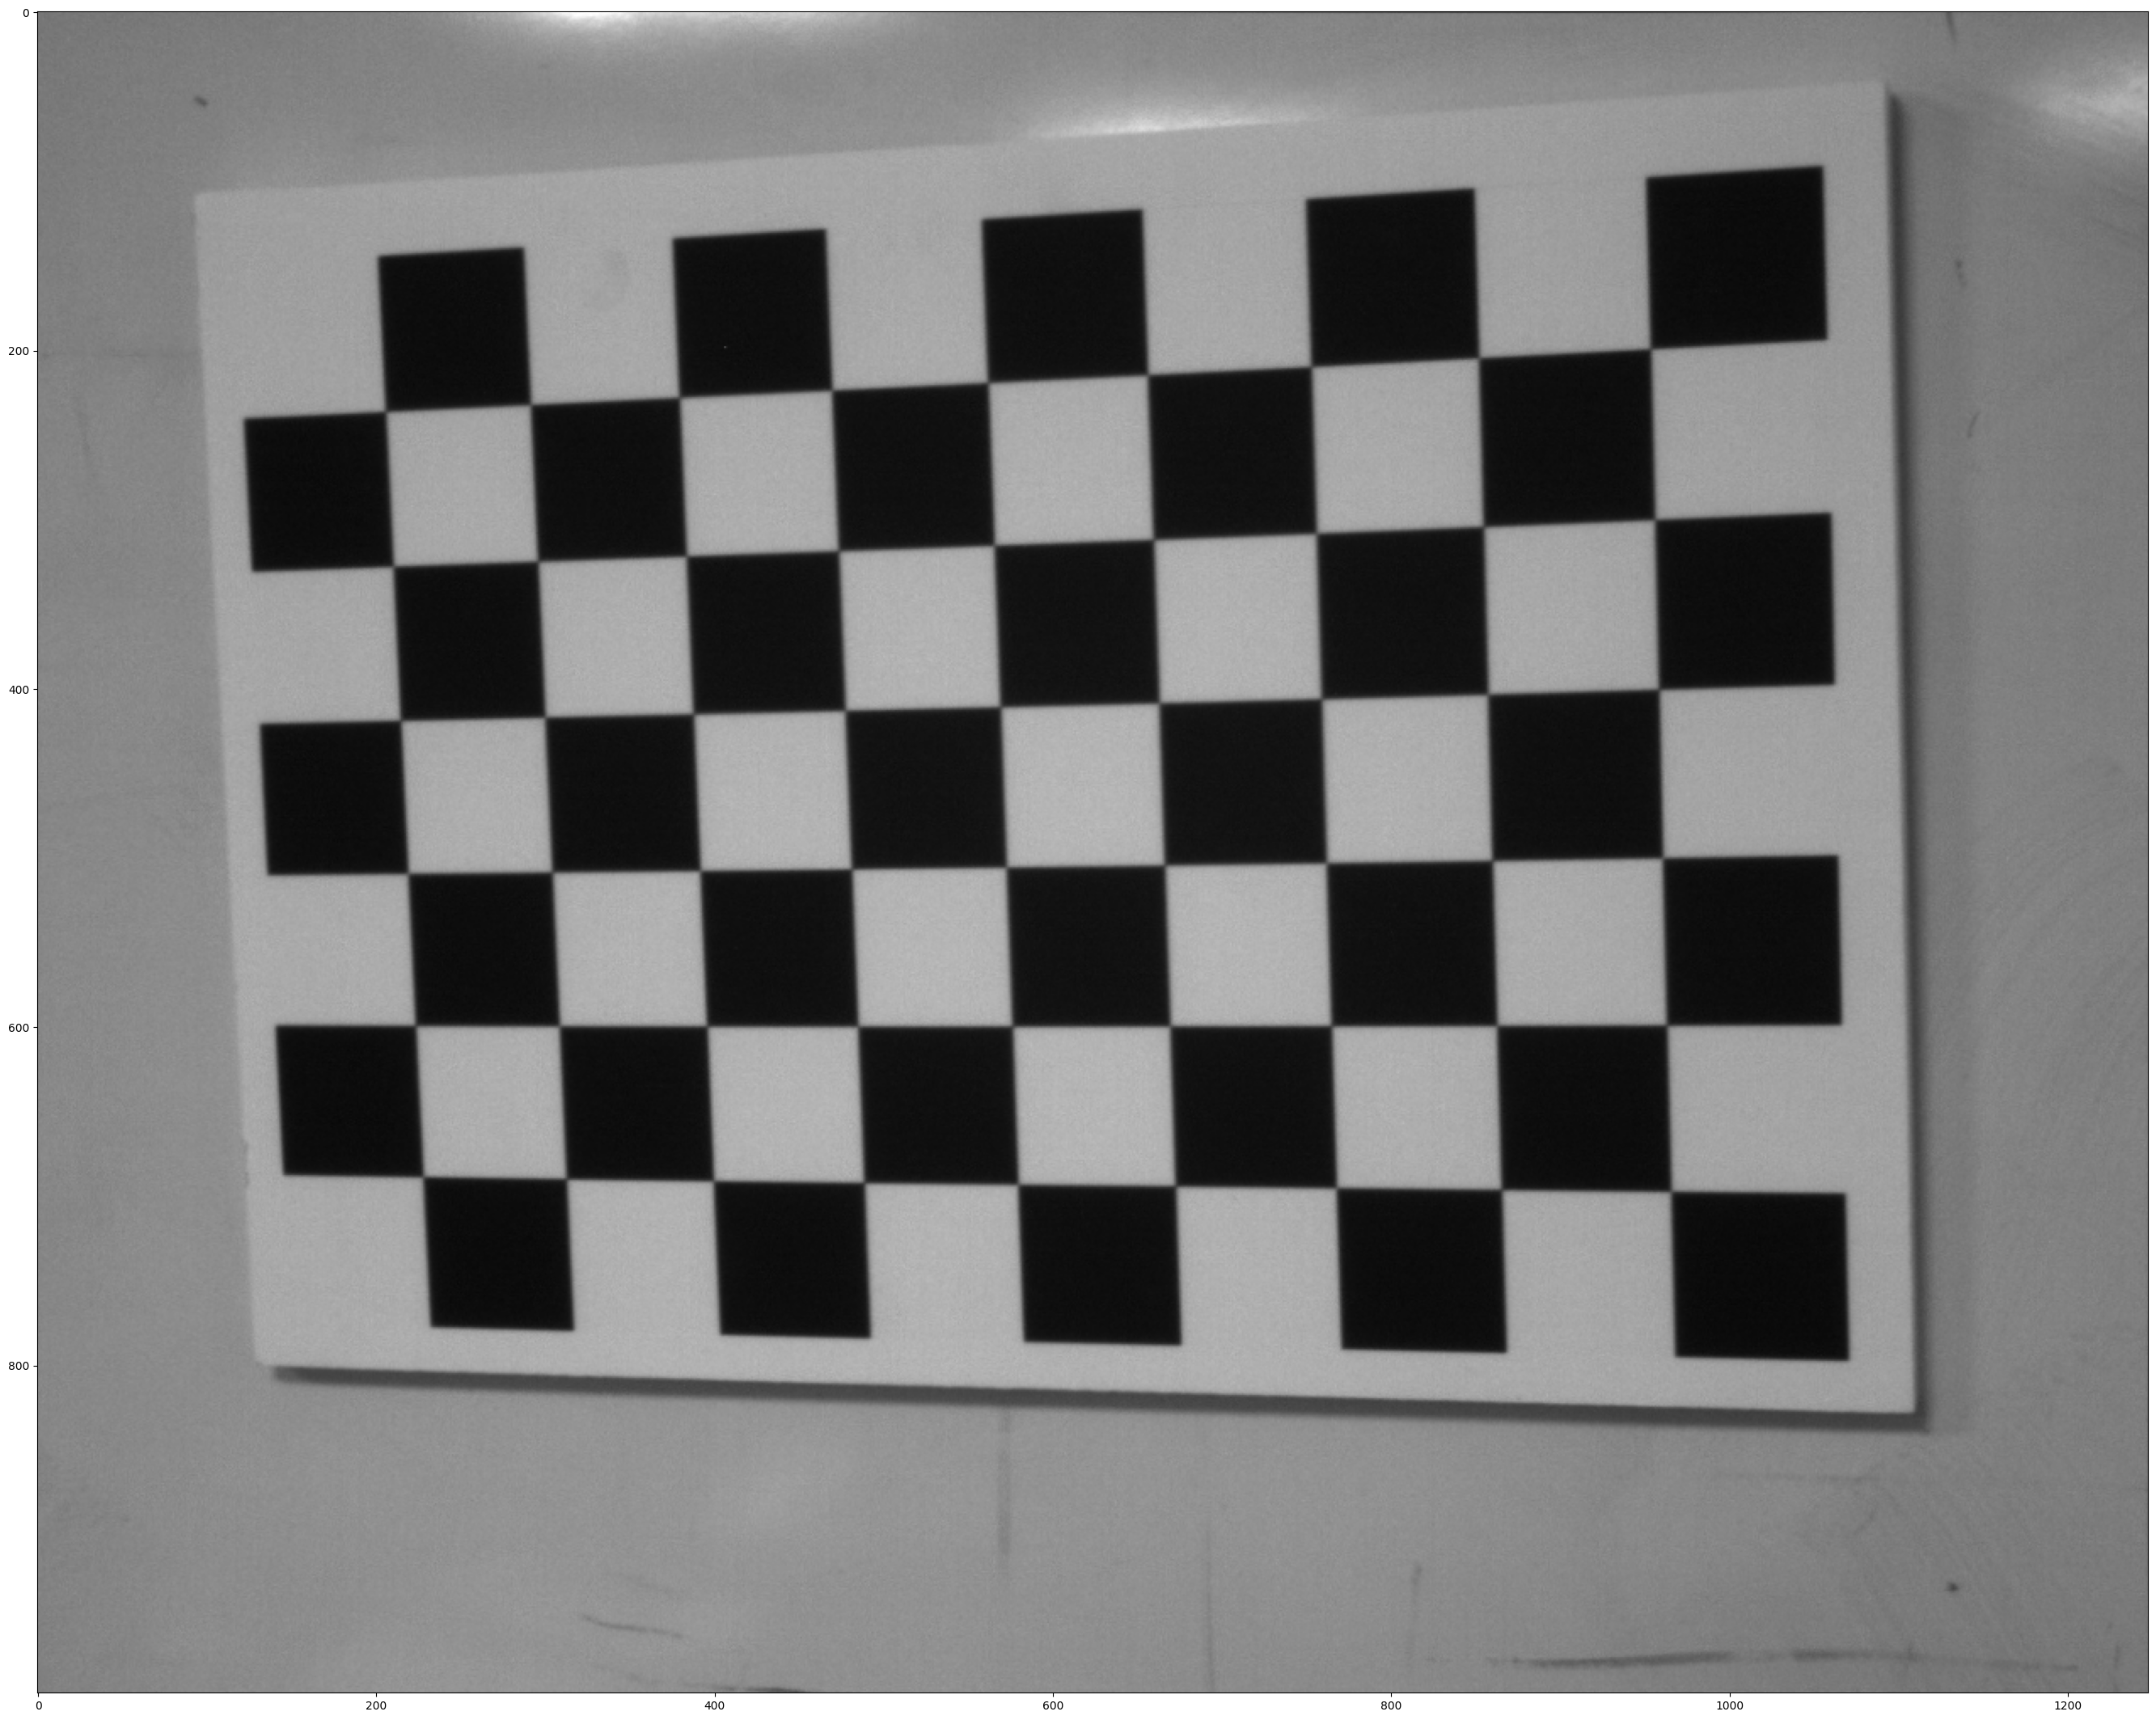

In [13]:
im = cv.imread('../Mindvision/mindvision_1.BMP')
fn.im_show(undistort_image(im, params))